<a href="https://colab.research.google.com/github/DataEtnos/estudos_python/blob/main/REGRESS%C3%83O_LINEAR_COM_VARIAVEIS_CATEGORICAS_DUMMYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#SETUP
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [5]:
df = pd.read_excel('/content/Limite_Credito_Dummy.xlsx')

df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Região,Gênero,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [7]:
df = pd.get_dummies(df, prefix=['Escolaridade','Região','Gênero'])


In [8]:
df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos,Região_RJ,Região_SP,Gênero_F,Gênero_M
0,70,10736,5214,400,500,True,False,True,False,True,False
1,68,5000,5000,380,600,True,False,True,False,True,False
2,44,5800,5800,500,800,True,False,True,False,True,False
3,72,4300,4300,2000,1000,True,False,True,False,True,False
4,75,4400,4400,3000,1000,True,False,True,False,True,False


In [9]:
df.corr()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos,Região_RJ,Região_SP,Gênero_F,Gênero_M
Idade,1.000000,0.239445,0.213186,0.057183,0.228117,-0.150088,0.150088,-0.196052,0.196052,-0.121217,0.121217
RendimentoTotal,0.239445,1.000000,0.960551,0.031041,0.858120,-0.396191,0.396191,-0.177798,0.177798,-0.406241,0.406241
Salario,0.213186,0.960551,1.000000,0.081792,0.888839,-0.475479,0.475479,-0.242621,0.242621,-0.424335,0.424335
LimitedeCreditoImediato,0.057183,0.031041,0.081792,1.000000,0.226990,-0.259433,0.259433,-0.001145,0.001145,-0.473326,0.473326
LimitedoChequeEspecial,0.228117,0.858120,0.888839,0.226990,1.000000,-0.598310,0.598310,-0.312566,0.312566,-0.591779,0.591779
Escolaridade_Fundamental_Medio,-0.150088,-0.396191,-0.475479,-0.259433,-0.598310,1.000000,-1.000000,0.237508,-0.237508,0.602464,-0.602464
Escolaridade_Superior_Pos,0.150088,0.396191,0.475479,0.259433,0.598310,-1.000000,1.000000,-0.237508,0.237508,-0.602464,0.602464
Região_RJ,-0.196052,-0.177798,-0.242621,-0.001145,-0.312566,0.237508,-0.237508,1.000000,-1.000000,-0.167248,0.167248
Região_SP,0.196052,0.177798,0.242621,0.001145,0.312566,-0.237508,0.237508,-1.000000,1.000000,0.167248,-0.167248
Gênero_F,-0.121217,-0.406241,-0.424335,-0.473326,-0.591779,0.602464,-0.602464,-0.167248,0.167248,1.000000,-1.000000


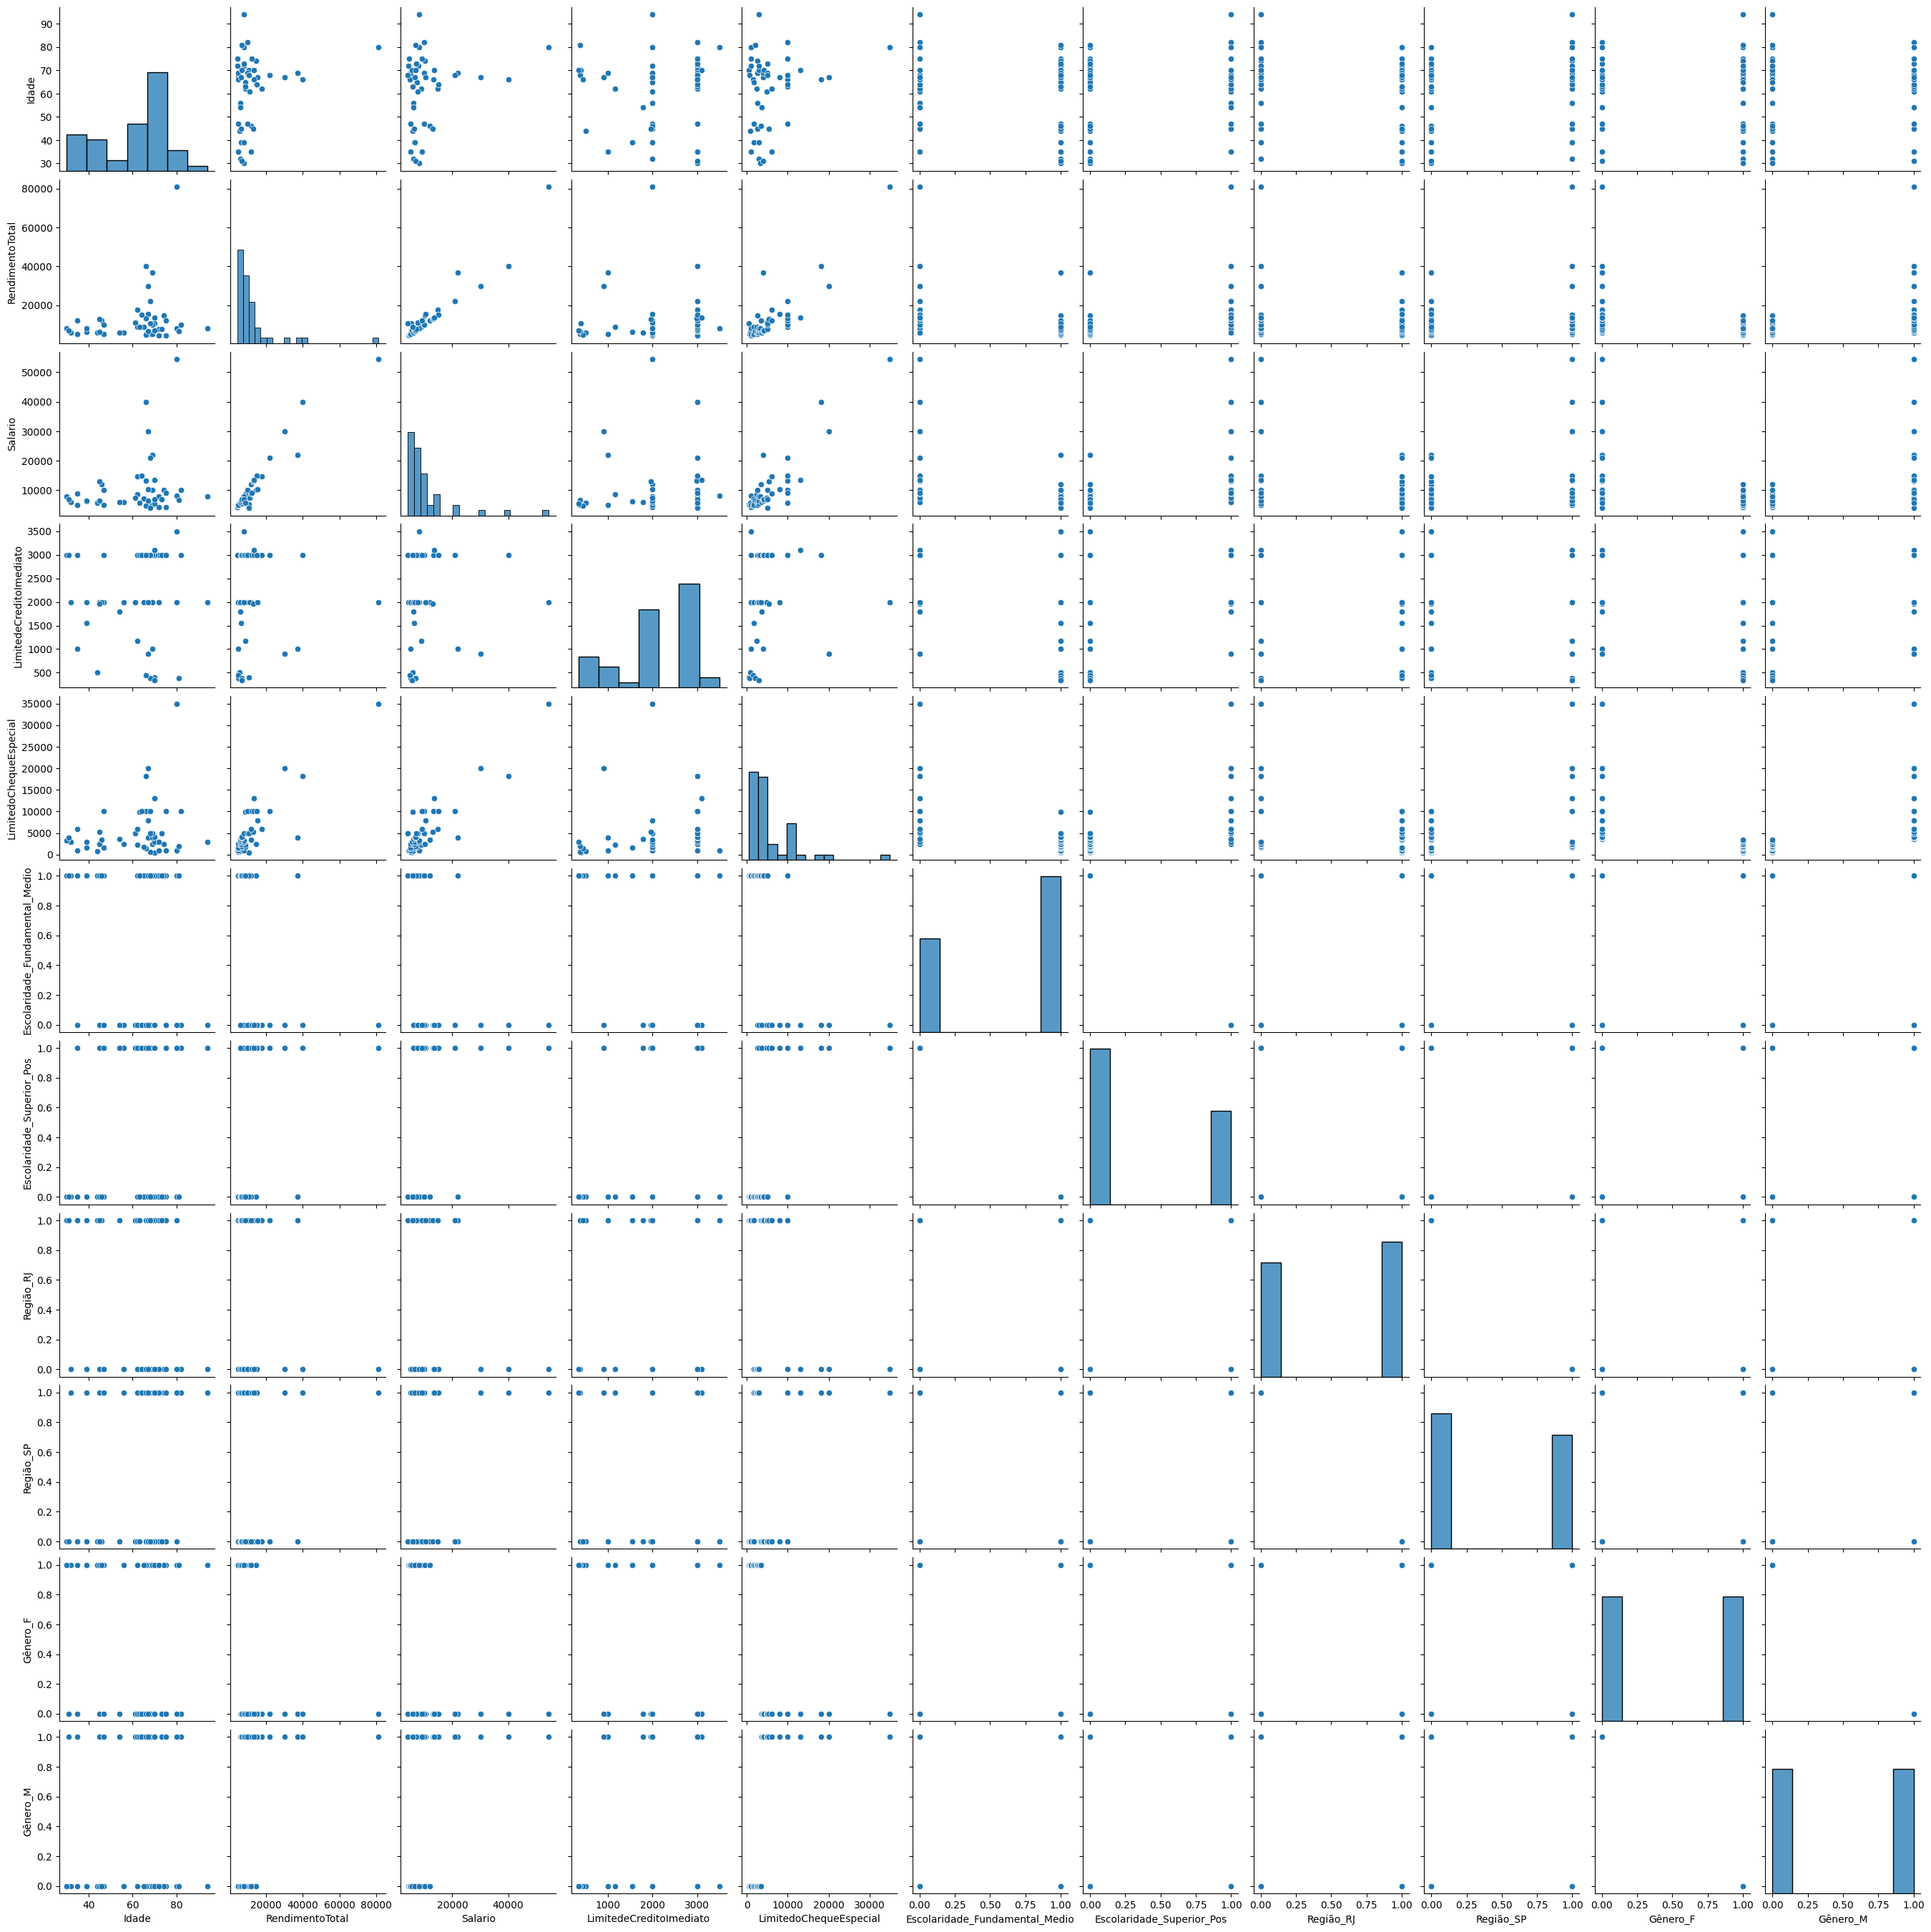

In [10]:
sns.pairplot(df)

In [11]:
df.columns

Index(['Idade', 'RendimentoTotal', 'Salario', 'LimitedeCreditoImediato',
       'LimitedoChequeEspecial', 'Escolaridade_Fundamental_Medio',
       'Escolaridade_Superior_Pos', 'Região_RJ', 'Região_SP', 'Gênero_F',
       'Gênero_M'],
      dtype='object')

In [12]:
#modelo MRLS
function = 'LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos+Região_RJ+Região_SP+Gênero_F+Gênero_M'
model = smf.ols(formula=function, data=df).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Thu, 06 Jun 2024   Prob (F-statistic):           7.44e-17
Time:                            23:33:06   Log-Likelihood:                -434.21
No. Observations:                      48   AIC:                             884.4
Df Residuals:                          40   BIC:                             899.4
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [15]:
#modelo MRLS
function = 'LimitedoChequeEspecial~Salario+Região_RJ+Região_SP+Gênero_F+Gênero_M-1'
model = smf.ols(formula=function, data=df).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.879
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     106.7
Date:                    Thu, 06 Jun 2024   Prob (F-statistic):           3.24e-20
Time:                            23:42:06   Log-Likelihood:                -435.50
No. Observations:                      48   AIC:                             879.0
Df Residuals:                          44   BIC:                             886.5
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------